In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
roughdraft = pd.read_csv("mergeddata.csv")
wordFrequency = {}

for y in roughdraft["Place Name_x"]:
	if y in wordFrequency.keys():
		wordFrequency[y] = wordFrequency.get(y)+1
	else: 
		wordFrequency[y] = 1

#wordFrequency["Other"] = wordFrequency.pop(NaN)
        
print(wordFrequency)

NameError: name 'NaN' is not defined

TypeError: nan is not a string

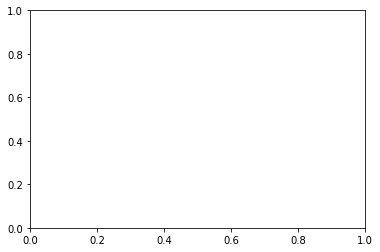

In [17]:
plt.bar(wordFrequency.keys(), wordFrequency.values(), 1.0, color='g')